# OSEMN Pipeline para la Ciencia de datos

OSEMN es un marco de trabajo de la Ciencia de datos que se utiliza para abordar cualquier tipo de problema de ciencia de datos.
Comprender el flujo de trabajo típico sobre cómo funciona este marco de trabajo de la ciencia de datos es un paso crucial hacia la comprensión empresarial y la resolución de problemas.
 

O - (Obtaining) Obtención de nuestros datos  
S - (Scrubbing) Fregar / Limpiar nuestros datos  
E - (Exploring) Explorar / visualizar nuestros datos nos permitirá encontrar patrones y tendencias  
M - (Modeling) Modelar nuestros datos nos dará nuestro poder predictivo como asistente  
N - (INterpreting) Interpretación de nuestros datos  

## Objetivo
La empresa quiere comprender qué factores contribuyeron más al abandono de empleados y crear un modelo que pueda predecir si un determinado empleado dejará la empresa o no. El objetivo es crear o mejorar diferentes estrategias de comportamiento de abandono de empleados específicos. En general, la implementación de este modelo permitirá a la gerencia crear mejores acciones de toma de decisiones.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1) Obtener los datos

Como primer paso es necesario obtener los datos. En algunas ocasiones ya tendremos el conjunto de datos a nuestra disposicion como es en este caso ```abandono_empleados.csv``` pero en la mayoria de veces se tiene que planear una recoleccion de datos para el posterior analisis.  
Alguna de las formas de recolectar datos pueden ser:
- Realizacion de encuestas.
- Consultas de API.
- Conectarse a una base de datos.
- Web Scraping (tecnica para recolectar datos de la web).
- Extraccion de datos de diferentes archivos.

## 2) Depuracion y Limpieza de los datos.

Despues de obtener los datos y estructuralos es necesario:
- Limpiarlos.
- Depurarlos
- Eliminar valores faltantes.
- Generar nuevas variables apartir de otras.
- Escalar algunas variables numericas a cierto rango.  
- Renombrar columnas.
- Ajustar unidades de medidas.

Para realizar los pasos mencionados empezamos importando nuestro dataset ```abandono_empleados.csv```

In [2]:
df = pd.read_csv('abandono_empleados.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Verificamos si existe valores nulos en nuestro dataset

In [3]:
# Esto suma todos los valores nulos de cada columna o variable
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
# Esto verifica si hay al menos un valor nulo en cada columna o variable
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

Cambiaremos el nombre de las columnas para mejor entendimiento.

In [5]:
df = df.rename(columns={'satisfaction_level': 'satisfaccion', 
                        'last_evaluation': 'evaluacion',
                        'number_project': 'n_proyectos',
                        'average_montly_hours': 'promedio_horas_trabajadas',
                        'time_spend_company': 'antiguedad',
                        'Work_accident': 'accidente_laboral',
                        'promotion_last_5years': 'promocion',
                        'sales' : 'departamento',
                        'salary': 'salario',
                        'left' : 'abandono'
                        })

In [6]:
df.head()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Binning
Es el proceso de transformar datos numericos o cuantitativos a categorias.  
En este caso generaremos una nueva variable categorica en base a la variable ```satisfaccion``` que es de tipo numerica.

In [7]:
# Almacenamos el minimo y maximo del rango
# de la variable satisfaccion, esta variable esta
# en el rango de 0 y 1.
minimo_valor = 0
maximo_valor = 1

# Ahora obtenemos cuatro valores separados linealmente en el rango
# de la variable `satisfaccion`
bins = np.linspace(minimo_valor,maximo_valor,4)

# Se crean las categorias con las que seran
# remplazados los valores numericos
label = ['Insatisfecho', 'Regular', 'Satisfecho']

# Creamos la nueva variable que sera categorica
# es el resultado de cortar la variable `satisfaccion`
# en 3 partes donde ciertos valores que pertenecen a cierto rango
# seran remplazado por las categorias que declaramos arriba
df['satisfaccion_cat'] = pd.cut(df.satisfaccion, labels=label, bins=bins, include_lowest=True)

# Ver el conjunto de datos
df.head()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion,departamento,salario,satisfaccion_cat
0,0.38,0.53,2,157,3,0,1,0,sales,low,Regular
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Satisfecho
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Insatisfecho
3,0.72,0.87,5,223,5,0,1,0,sales,low,Satisfecho
4,0.37,0.52,2,159,3,0,1,0,sales,low,Regular


### Tipos de datos
Para saber el tipo de los datos con los que estamos trabajando:

In [8]:
df.dtypes

satisfaccion                  float64
evaluacion                    float64
n_proyectos                     int64
promedio_horas_trabajadas       int64
antiguedad                      int64
accidente_laboral               int64
abandono                        int64
promocion                       int64
departamento                   object
salario                        object
satisfaccion_cat             category
dtype: object

Como podemos ver las variables ```salario``` y ```departamento``` deberian ser variables categoricas entonces cambiamos el tipo de dato con la siguiente instruccion.

In [9]:
df['departamento'] = df['departamento'].astype('category')
df['salario'] = df['salario'].astype('category')

Como podemos ver ahora el tipo de dato de esas variables fueron corregidos.

In [10]:
df.dtypes

satisfaccion                  float64
evaluacion                    float64
n_proyectos                     int64
promedio_horas_trabajadas       int64
antiguedad                      int64
accidente_laboral               int64
abandono                        int64
promocion                       int64
departamento                 category
salario                      category
satisfaccion_cat             category
dtype: object

## 3) Explorando los datos

#### Cantidad de datos.
La cantidad total de datos para este conjuntos es de:

In [11]:
size_dataset, _ = df.shape
print('El tamaño de los datos es de ',size_dataset)

El tamaño de los datos es de  14999


Grafica que muestra la cantidad de datos para cada clase de ```abandono``` como podemos ver hay mucho mas datos de empleados que no abandonaron la empresa que de los que abandonaron.

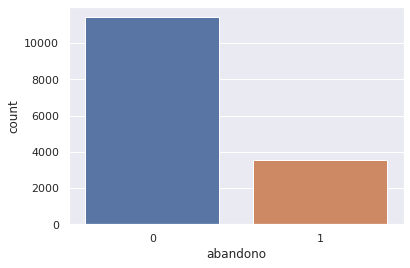

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x='abandono')

### 3.1) Resumen estadistico de todas las variables

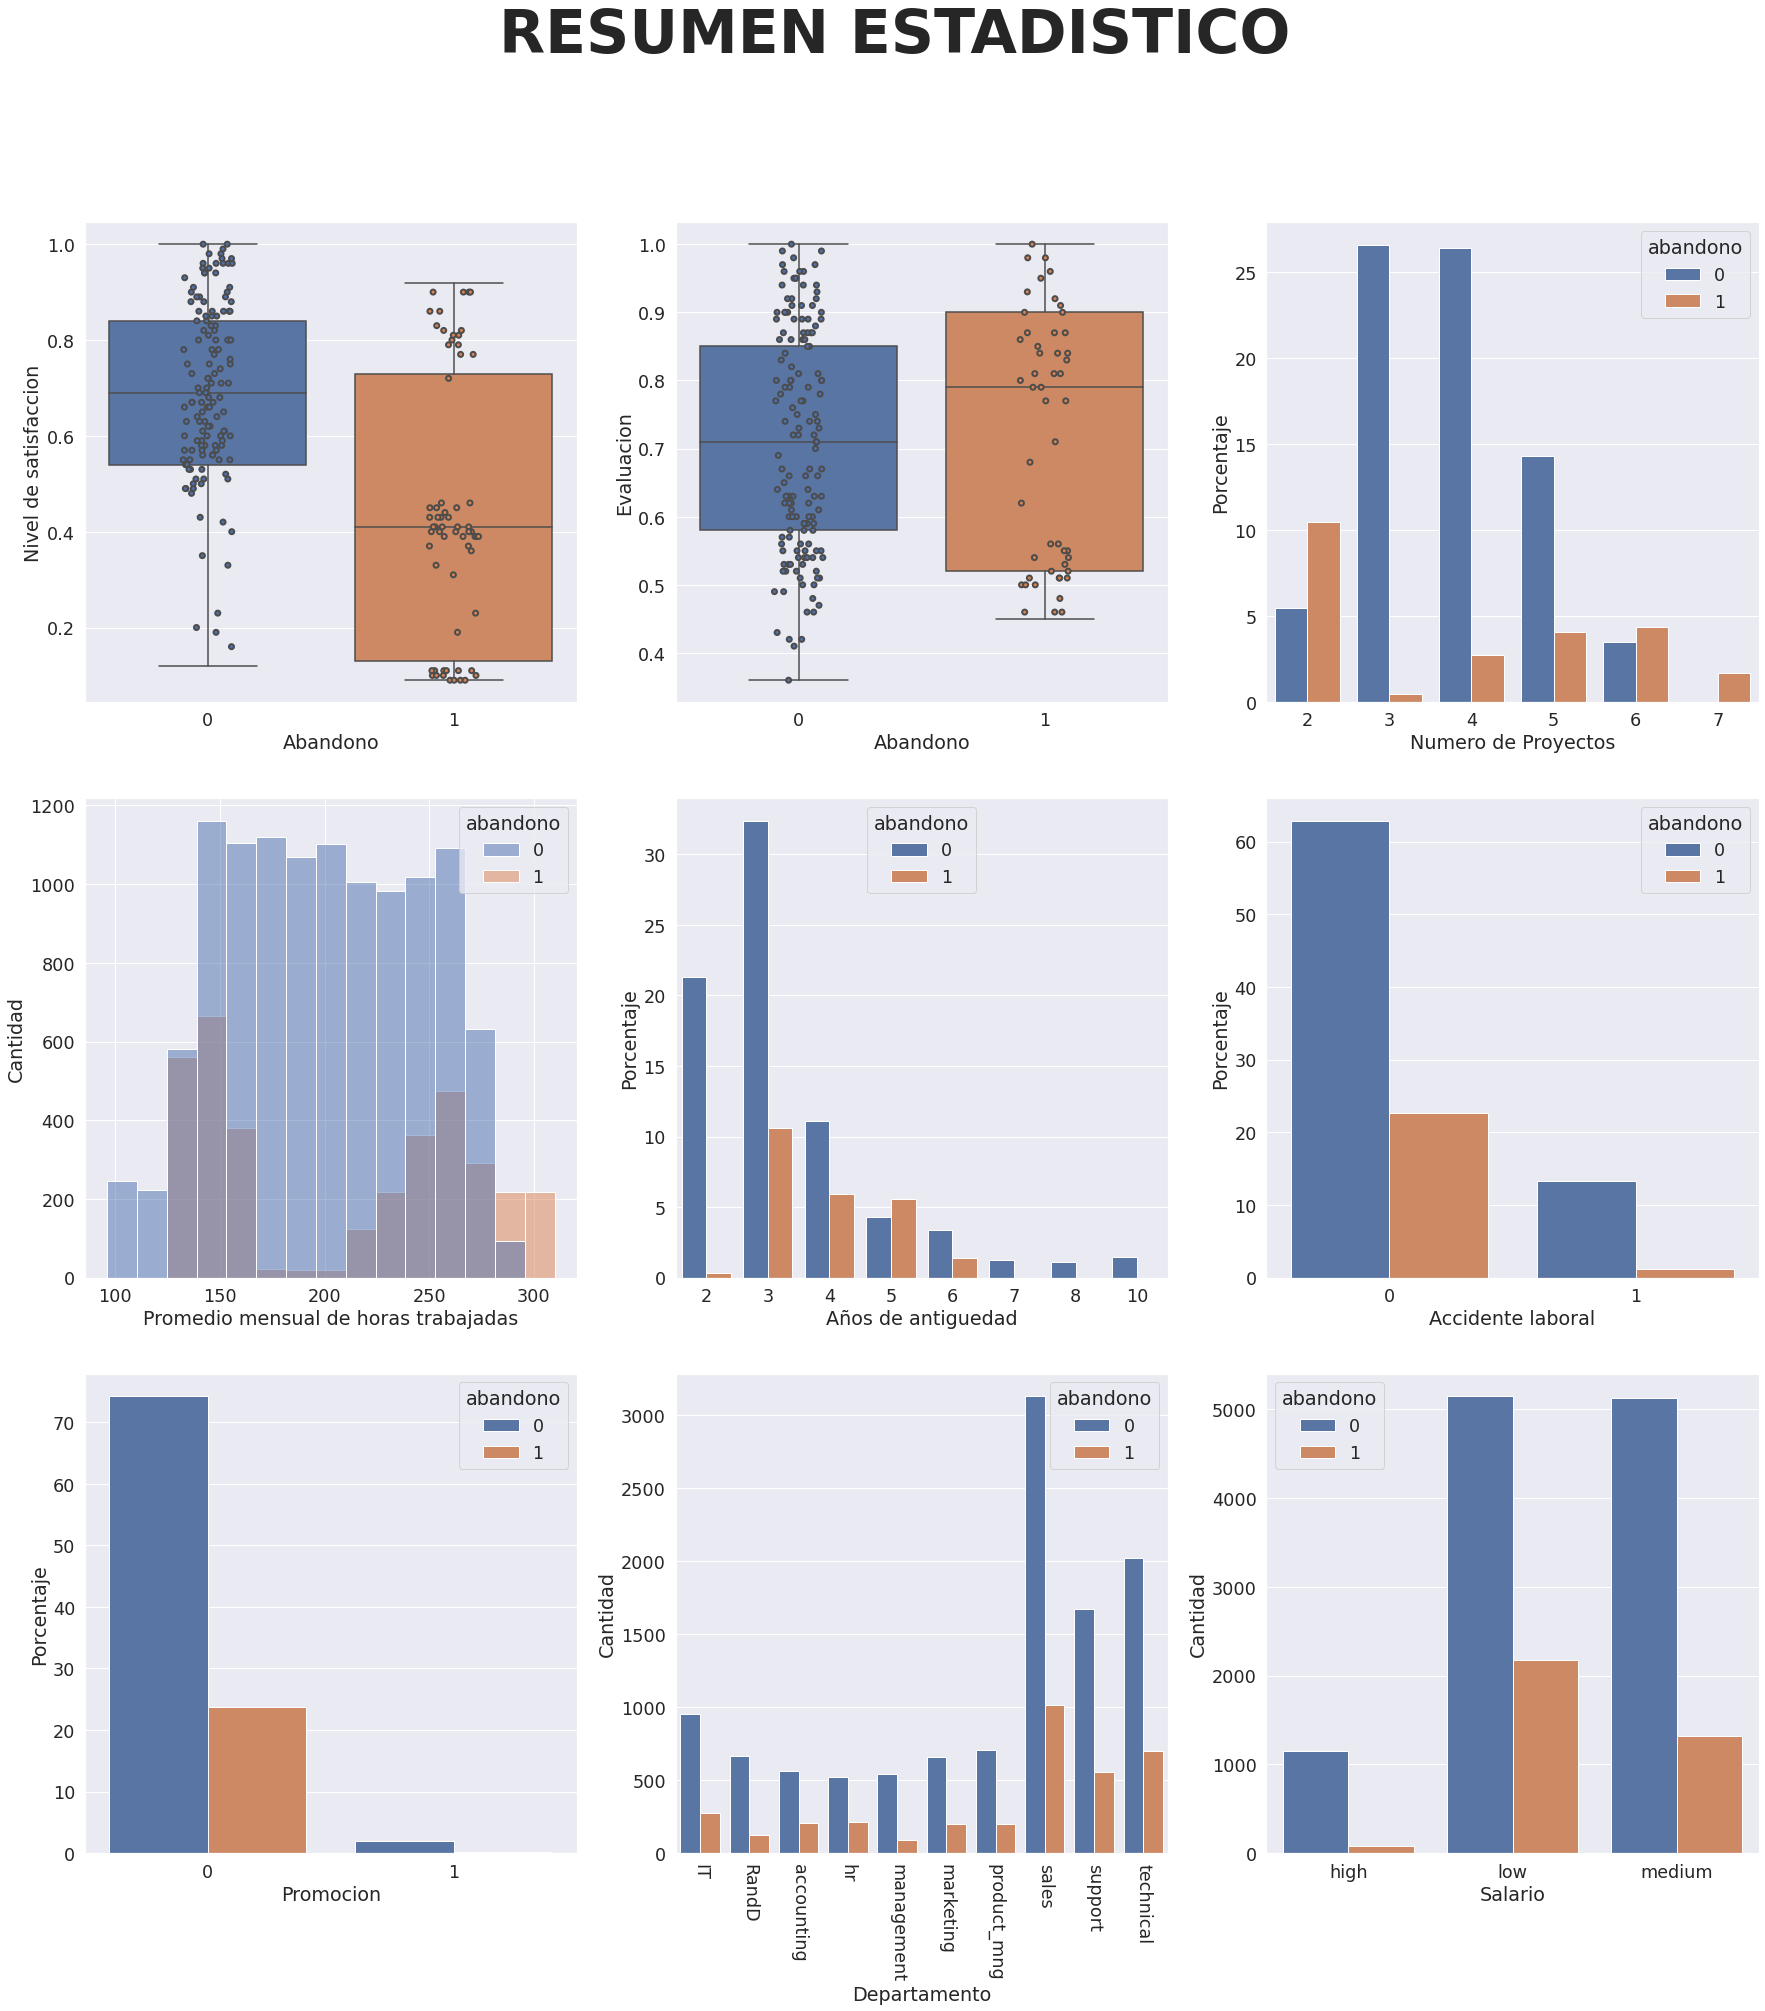

In [13]:
fig = plt.figure(figsize=(30,30))
fig.suptitle("RESUMEN ESTADISTICO",fontweight='bold', fontsize=60)
sns.set(font_scale = 1.6)

plt.subplot(331)
sns.stripplot(x="abandono", y='satisfaccion', data=df.sample(200), jitter=True, size=5, edgecolor='gray',linewidth=2)
sns.boxplot(x="abandono", y='satisfaccion',data=df)
plt.xlabel('Abandono')
plt.ylabel('Nivel de satisfaccion')

plt.subplot(332)
sns.stripplot(x="abandono", y='evaluacion', data=df.sample(200), jitter=True, size=5, edgecolor='gray',linewidth=2)
sns.boxplot(x="abandono", y='evaluacion',data=df)
plt.xlabel('Abandono')
plt.ylabel('Evaluacion')

plt.subplot(333)
sns.barplot(x="n_proyectos", y='n_proyectos', hue='abandono', data=df, estimator=lambda x: (len(x)/ len(df)*100))
plt.xlabel('Numero de Proyectos')
plt.ylabel('Porcentaje')

plt.subplot(334)
sns.histplot(data=df, x='promedio_horas_trabajadas',hue='abandono', bins=15, color='red')
plt.xlabel('Promedio mensual de horas trabajadas')
plt.ylabel('Cantidad')

plt.subplot(335)
ax = sns.barplot(x="antiguedad", y="antiguedad", hue="abandono", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Porcentaje")
plt.xlabel('Años de antiguedad')
plt.ylabel('Porcentaje')

plt.subplot(336)
sns.barplot(x="accidente_laboral", y="accidente_laboral", hue="abandono", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.xlabel('Accidente laboral')
plt.ylabel('Porcentaje')


plt.subplot(337)
sns.barplot(x="promocion", y="promocion", hue="abandono", data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.xlabel('Promocion')
plt.ylabel('Porcentaje')

plt.subplot(338)
sns.countplot(x="departamento", hue='abandono', data=df)
plt.xticks(rotation=-90)
plt.xlabel('Departamento')
plt.ylabel('Cantidad')

plt.subplot(339)
sns.countplot(x="salario", hue='abandono', data=df)
plt.xlabel('Salario')
plt.ylabel('Cantidad')

plt.show()

#### La media de cada variable para los empleados que abandonaron y no.

In [14]:
resumen_abandono = df.groupby('abandono')
resumen_abandono.mean()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,promocion
abandono,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### La mediana de cada variable para los empleados que abandonaron y no.

In [15]:
resumen_abandono.median()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,promocion
abandono,,,,,,,
0,0.69,0.71,4,198,3,0,0
1,0.41,0.79,4,224,4,0,0


#### La suma de los valores de cada variable para los empleados que abandonaron y no.

In [16]:
resumen_abandono.sum()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,promocion
abandono,,,,,,,
0,7620.30,8176.43,43274,2274860,38627,2000,300
1,1571.59,2564.38,13768,740694,13843,169,19


#### El valor maximo de cada variable para los empleados que abandonaron y no.

In [17]:
resumen_abandono.max()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,promocion,satisfaccion_cat
abandono,,,,,,,,
0,1.00,1.0,6,287,10,1,1,Satisfecho
1,0.92,1.0,7,310,6,1,1,Satisfecho


#### El valor minimo de cada variable para los empleados que abandonaron y no.

In [18]:
resumen_abandono.min()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,promocion,satisfaccion_cat
abandono,,,,,,,,
0,0.12,0.36,2,96,2,0,0,Insatisfecho
1,0.09,0.45,2,126,2,0,0,Insatisfecho


### 3.2) Matriz de Correlacion

<AxesSubplot:>

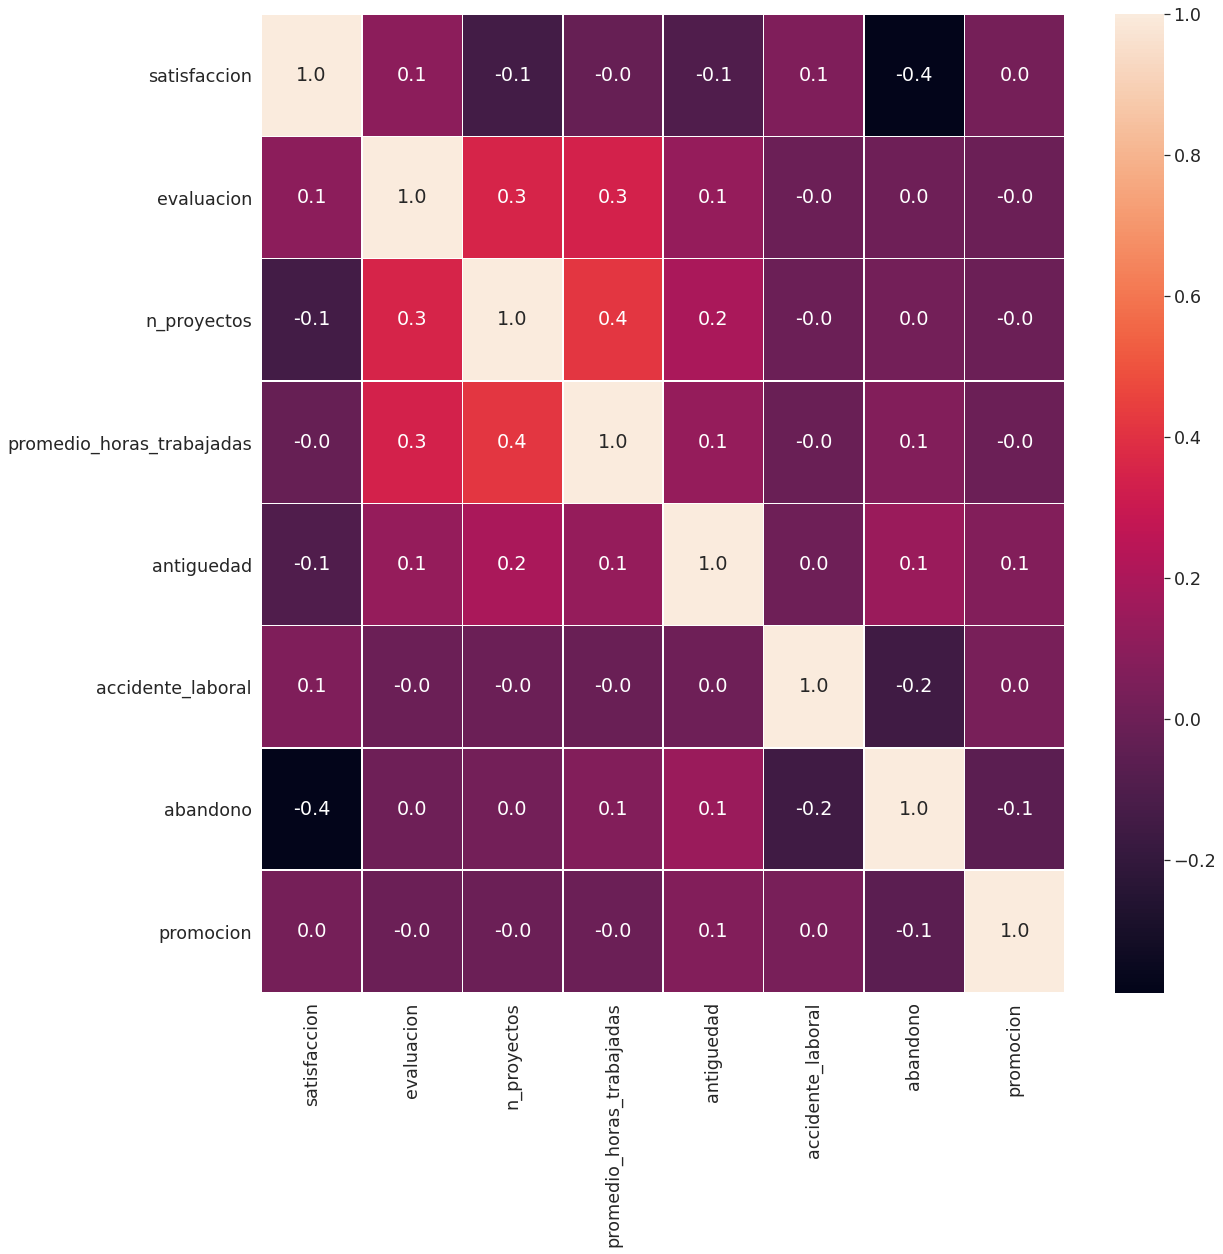

In [19]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
df.corr()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion
satisfaccion,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluacion,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
n_proyectos,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
promedio_horas_trabajadas,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
antiguedad,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
accidente_laboral,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
abandono,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promocion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### Correlaciones encontradas:
***Correlaciones positivas:***
- n_proyectos - evaluacion = 0.349
- n_proyectos - promedio_horas_trabajadas = 0.417
- promedio_horas_trabajadas - evaluacion = 0.339

***Correlaciones negativas:***
- satisfaccion - abandono = -0.3883

### 3.3) Test estadistico de correlation

#### Prueba T de una muestra (Medición del nivel de satisfacción)
---
Una prueba t de una muestra verifica si la media de una muestra difiere de la media de la población. Dado que la satisfacción tiene la mayor correlación con nuestra variable de abandono dependiente, analicemos si el nivel de satisfacción promedio de los empleados que abandonaron la compañia difiere de los que no lo hicieron.

**Prueba de hipótesis:** ¿Existe una diferencia significativa en los medios de nivel de satisfacción entre los empleados que abandonaron y los empleados que no lo hicieron? 

**Hipótesis nula:** (H0: pTS = pES) La hipótesis nula sería que no hay diferencia en el nivel de satisfacción entre los empleados que abandonaron los que no. 

**Hipótesis alternativa:** (HA: pTS! = pES) La hipótesis alternativa sería sea que hay una diferencia en el nivel de satisfacción entre los empleados que abandonaron y los que no.

Comparemos las medias de nuestra satisfacción de abandono de empleados con la satisfacción de la población de empleados

In [21]:
emp_population = df['satisfaccion'][df['abandono'] == 0].mean()

In [22]:
emp_abandono_satisfaccion = df[df['abandono']==1]['satisfaccion'].mean()

In [23]:
print( 'La satisfacción media para la población de empleados que no abandonaron es: ' + str(emp_population))
print( 'La satisfacción media para la población de empleados que abandonaron es: ' + str(emp_abandono_satisfaccion) )

La satisfacción media para la población de empleados que no abandonaron es: 0.666809590479524
La satisfacción media para la población de empleados que abandonaron es: 0.4400980117614114


#### Realizando la prueba T
---
Realicemos una prueba t con un nivel de confianza del 95% y veamos si rechaza correctamente la hipótesis nula de que la muestra proviene de la misma distribución que la población de empleados. Para realizar una prueba t de una muestra, podemos usar la función ```stats.ttest_1samp()```

In [24]:
import scipy.stats as stats
stats.ttest_1samp(
    a=df[df['abandono']==1]['satisfaccion'], # Muestra de nivel de satisfaccion de los empleados que abandonaron
    popmean=emp_population # Media del nivel de satisfaccion de los empleados que no abandonaron
)

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

De igual manera podemos utilizar la ecuacion que seria la siguiente: 

\\[ t = \frac{m-\mu}{s/\sqrt{n}} \\]

\\[m = media  \\]
\\[\mu =  media poblacional \\]
\\[s = desviacion estandar  \\]
\\[n = tamaño de la poblacion\\]

In [25]:
from math import sqrt
mean_test = df[df['abandono']==1]['satisfaccion'].mean()
std_test = df[df['abandono']==1]['satisfaccion'].std()
t = (mean_test - emp_population)/ (std_test/sqrt(len(df[df['abandono']==1]['satisfaccion'])))
t

-51.33034867547431

In [26]:
stats.ttest_1samp(
    a=df[df['abandono']==0]['satisfaccion'], # Muestra de nivel de satisfaccion de los empleados que abandonaron
    popmean=df[df['abandono']==1]['satisfaccion'].mean() # Media del nivel de satisfaccion de los empleados que no abandonaron
)

Ttest_1sampResult(statistic=111.63271389530682, pvalue=0.0)

#### Resultado de la prueba T
---
El resultado de la prueba muestra que la estadística de prueba "t" es igual a -51.33. Esta estadística de prueba nos dice cuánto se desvía la media muestral de la hipótesis nula. Si el estadístico t se encuentra fuera de los cuantiles de la distribución t correspondiente a nuestro nivel de confianza y grados de libertad, rechazamos la hipótesis nula. Podemos verificar los cuantiles con ```stats.t.ppf()```

#### Cuantil de prueba T 
---
Si el valor de estadística t que calculamos arriba (-51.33) está fuera de los cuantiles, entonces podemos rechazar la hipótesis nula

In [27]:
degree_freedom = len(df[df['abandono']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print('El rango del cuartil izquierdo de la distribución t es: ' + str(LQ))
print('El rango del cuartil derecho de la distribución t es ' + str(RQ))

El rango del cuartil izquierdo de la distribución t es: -1.9606285215955626
El rango del cuartil derecho de la distribución t es 1.9606285215955621


#### Resumen del T-TEST One sample
---
##### T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis

#### Pregunta: ¿Cómo es que el valor P es literalmente 0.0? 

**Rechace la hipótesis nula porque:** 
*   La puntuación de la prueba T está fuera de los cuantiles 
*   El valor P es inferior al nivel de confianza del 5%

Según el análisis estadístico de una prueba t de una muestra, parece haber una diferencia significativa entre la satisfacción media de los empleados que abandonaron y la población total de empleados que no abandonaron. El valor P súper bajo de **0.00_** a un nivel de confianza del 5% es un buen indicador para rechazar la hipótesis nula.

Pero esto no necesariamente significa que haya un significado práctico. Tendríamos que llevar a cabo más experimentos o tal vez recopilar más datos sobre los empleados para llegar a un hallazgo más preciso.

### 3.4) Distribucion de los datos

**Resumen:** examinemos la distribución de algunas de las características del empleado.

*   **Satisfacción:** hay un gran aumento para los empleados con baja satisfacción y alta satisfacción.
*   **Evaluación:** existe una distribución bimodal de empleados para evaluaciones bajas (menos de 0.6) y evaluaciones altas (más de 0.8)
*   **Promedio de horas mensuales:** existe otra distribución bimodal de empleados con un promedio de horas mensuales cada vez mayor (menos de 150 horas y más de 250 horas)
*   La evaluación y los gráficos de horas mensuales promedio comparten una distribución similar.
*   Los empleados con horas mensuales promedio más bajas fueron evaluados menos y viceversa.
*   Si mira hacia atrás en la matriz de correlación, la alta correlación entre la evaluación y el promedio de las horas mensuales respalda este hallazgo.

**Para y piensa:**

*   ¿Hay alguna razón para el alto pico en la baja satisfacción de los empleados?
*   ¿Podrían los empleados agruparse de alguna manera con estas características?
*   ¿Existe una correlación entre la evaluación y las horas promedio mensuales?

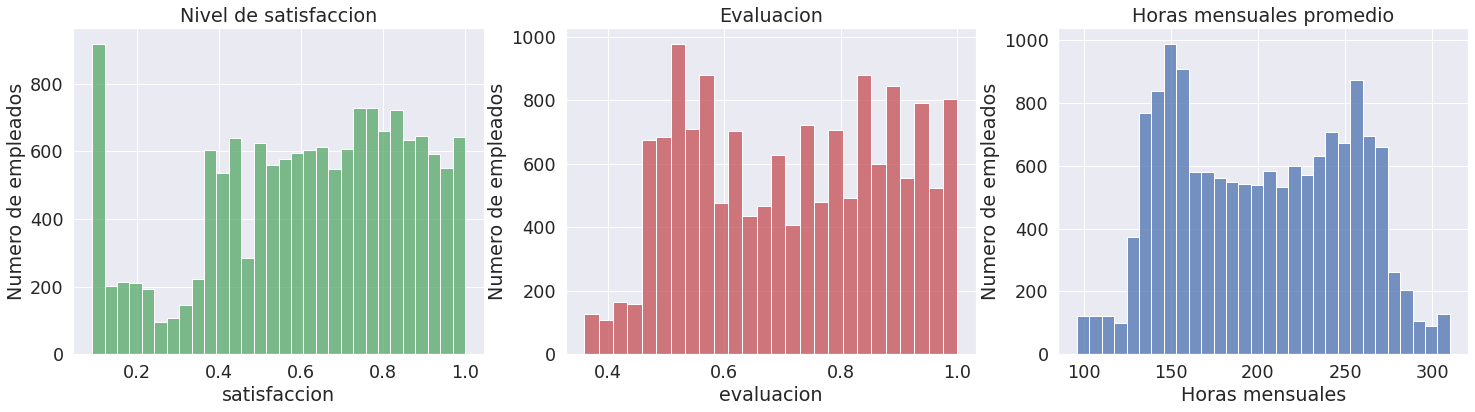

In [28]:
# Configurando la figura en matplotlib
f, axes = plt.subplots(ncols=3, figsize=(25,6))

# Grafica el nivel de satisfaccion de los empleados
sns.histplot(df.satisfaccion, kde=False, color="g", ax=axes[0]).set_title('Nivel de satisfaccion')
axes[0].set_ylabel('Numero de empleados')

# Grafica la evaluacion de los empleados
sns.histplot(df.evaluacion, kde=False, color="r", ax=axes[1]).set_title('Evaluacion')
axes[1].set_ylabel('Numero de empleados')

# Grafica de horas mensuales promedio del empleado
sns.histplot(df.promedio_horas_trabajadas, kde=False, color="b", ax=axes[2]).set_title('Horas mensuales promedio')
axes[2].set_xlabel('Horas mensuales')
axes[2].set_ylabel('Numero de empleados')

plt.show()

### 3.4) Salario vs Abandono

**Resumen:** esto no es inusual.

*   La mayoría de los empleados que se fueron tenían un salario **bajo** o **medio**.
*   Apenas quedan empleados con sueldo **alto**
*   Los empleados con salarios bajos a promedio tienden a abandonar la empresa.

**Para y piensa:**

*   ¿Cómo es el ambiente de trabajo para los salarios bajos, medios y altos?
*   ¿Qué hizo que los empleados con altos salarios se fueran?

Text(0, 0.5, 'Salario')

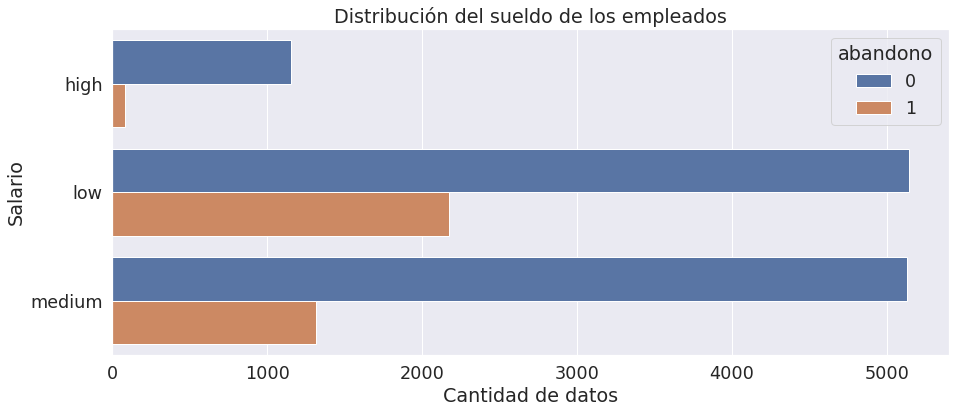

In [29]:
f, ax = plt.subplots(figsize=(15, 6))
sns.countplot(y="salario", hue='abandono', data=df).set_title('Distribución del sueldo de los empleados');
plt.xlabel('Cantidad de datos')
plt.ylabel('Salario')

### 3.5) Departamento vs Abandono

**Resumen:** veamos más información sobre los departamentos.

*   El departamento de **ventas**, **técnico** y de **soporte** fueron los 3 principales departamentos en tener abandono de empleados
*   El departamento de administración tuvo la menor cantidad de facturación

**Para y piensa:**

*   Si tuviéramos más información sobre cada departamento, ¿podemos identificar una causa más directa para el abandono de empleados?

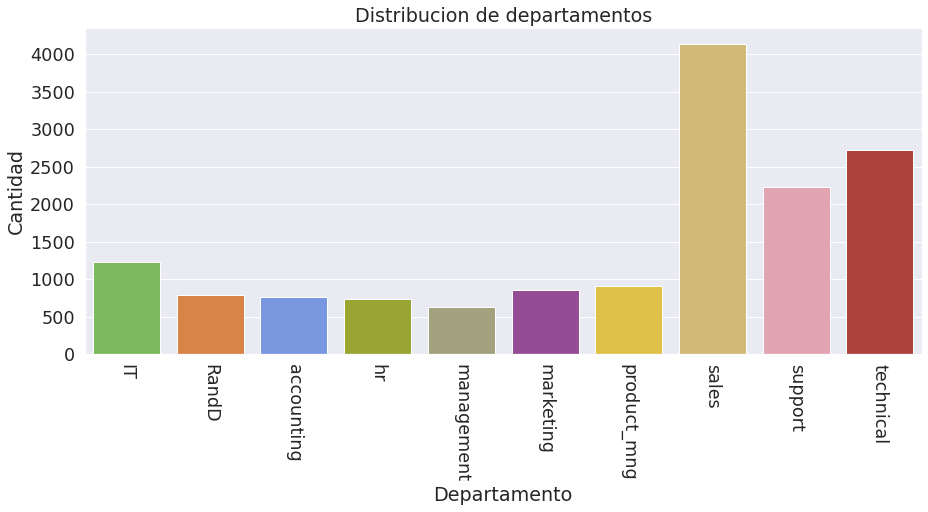

In [30]:
plt.subplots(figsize=(15, 6))

# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']


sns.countplot(x='departamento', data=df, palette=color_types).set_title('Distribucion de departamentos');
plt.xticks(rotation=-90)
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
# Rotate x-labels

plt.show()

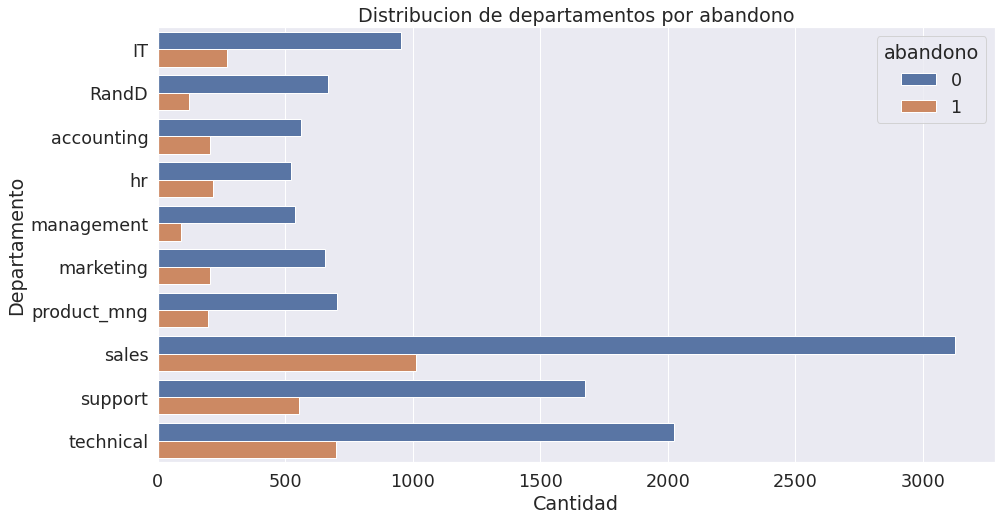

In [31]:
plt.subplots(figsize=(15, 8))
sns.countplot(y="departamento", hue='abandono', data=df).set_title('Distribucion de departamentos por abandono');
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()

### 3.6) Numero de proyectos vs Abandono

**Resumen:** Este gráfico también es bastante interesante.

*   Más de la mitad de los empleados con **2,6** y **7** proyectos abandonaron la empresa.
*   La mayoría de los empleados que no abandonaron la empresa tenían **3,4** y **5** proyectos.
*   Todos los empleados con **7** proyectos abandonaron la empresa.
*   Hay un aumento en la tasa de abandono de empleados a medida que aumenta el recuento de proyectos

**Para y piensa:**

*   ¿Por qué los empleados se van al espectro más bajo / más alto de conteos de proyectos?
*   ¿Significa esto que los empleados con un recuento de proyectos 2 o menos no trabajan lo suficiente o no son altamente valorados, por lo que dejan la empresa?
*   ¿Los empleados con más de 6 proyectos están trabajando demasiado, dejando así la empresa?

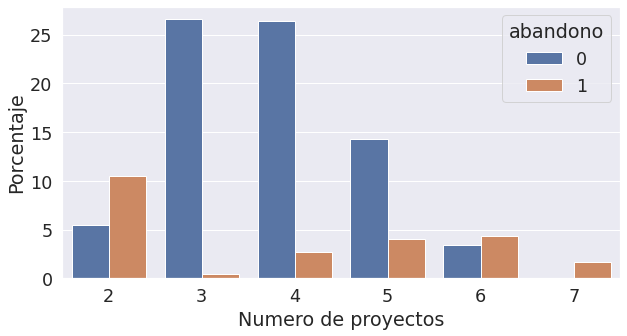

In [32]:
plt.subplots(figsize=(10, 5))
sns.barplot(x="n_proyectos", y="n_proyectos", hue="abandono", data=df, estimator=lambda x: (len(x) / len(df) * 100))
plt.ylabel("Porcentaje")
plt.xlabel("Numero de proyectos")
plt.show()

### 3.7) Evaluacion vs Abandono

**Resumen:**

*   Hay una distribución biomodal para aquellos que abandonaron.
*   Los empleados con **bajo** rendimiento tienden a abandonar más la empresa
*   Los empleados con **alto** rendimiento tienden a abandonar la empresa más
*   El **punto óptimo** para los empleados que se quedaron está dentro de la evaluación **0.6-0.8**

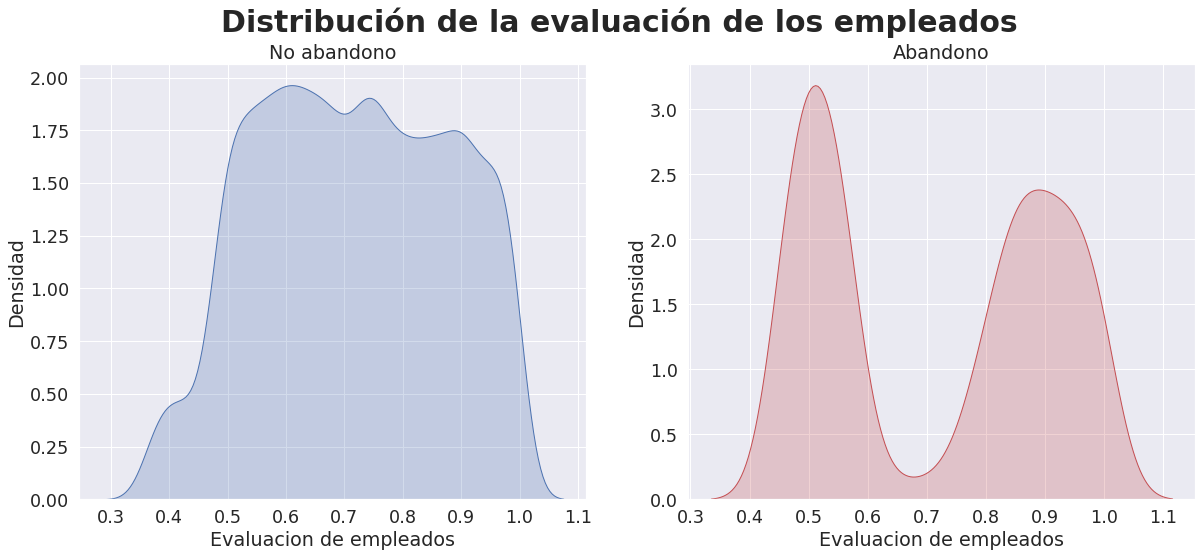

In [33]:
f, axes = plt.subplots(ncols=2, figsize=(20,8))
f.suptitle('Distribución de la evaluación de los empleados',fontweight='bold', fontsize=30)

sns.kdeplot(df.loc[(df['abandono'] == 0),'evaluacion'] , color='b',shade=True, ax=axes[0]).set_title('No abandono')
axes[0].set_xlabel('Evaluacion de empleados')
axes[0].set_ylabel('Densidad')

sns.kdeplot(df.loc[(df['abandono'] == 1),'evaluacion'] , color='r',shade=True, ax=axes[1]).set_title('Abandono')
axes[1].set_xlabel('Evaluacion de empleados')
axes[1].set_ylabel('Densidad')

plt.show()

### 3.8) Promedio de horas trabajadas mensualmente vs Abandono

**Resumen:**

*  Otra distribución bimodal para empleados que volcaron
*  Los empleados que tenían menos horas de trabajo **(~ 150 horas o menos)** abandonaron la empresa más
*  Los empleados que tenían demasiadas horas de trabajo **(~ 250 o más)** dejaron la empresa
*  Los empleados que se fueron generalmente tenían **poco** o demasiado **trabajo**.

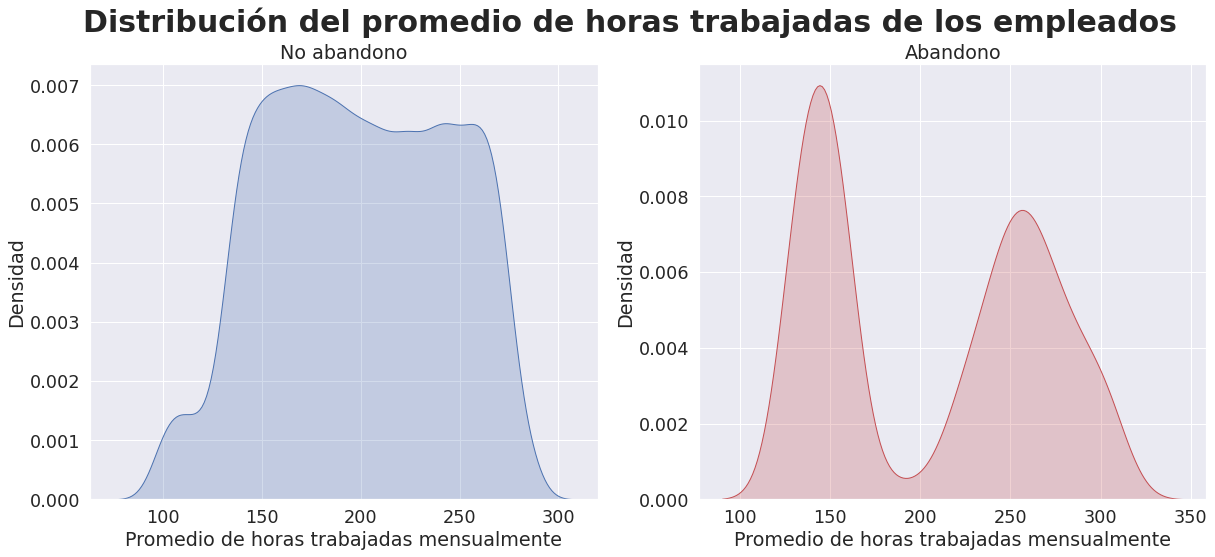

In [34]:
f, axes = plt.subplots(ncols=2, figsize=(20,8))
f.suptitle('Distribución del promedio de horas trabajadas de los empleados',fontweight='bold', fontsize=30)

sns.kdeplot(df.loc[(df['abandono'] == 0),'promedio_horas_trabajadas'] , color='b',shade=True, ax=axes[0]).set_title('No abandono')
axes[0].set_xlabel('Promedio de horas trabajadas mensualmente')
axes[0].set_ylabel('Densidad')

sns.kdeplot(df.loc[(df['abandono'] == 1),'promedio_horas_trabajadas'] , color='r',shade=True, ax=axes[1]).set_title('Abandono')
axes[1].set_xlabel('Promedio de horas trabajadas mensualmente')
axes[1].set_ylabel('Densidad')

plt.show()

### 3.9) Satisfaccion vs Abandono

**Resumen:**

*   Hay una distribución **trimodal** para los empleados que abandonaron. 
*   Los empleados que tenían niveles de satisfacción realmente bajos **(0.2 o menos)** abandonaron la empresa más
*   Los empleados que tenían bajos niveles de satisfacción **(0.3 ~ 0.5)** dejaron la compañía.
*   Los empleados que tenían niveles de satisfacción realmente altos **(0.7 o más)** dejaron tambien la compañía.

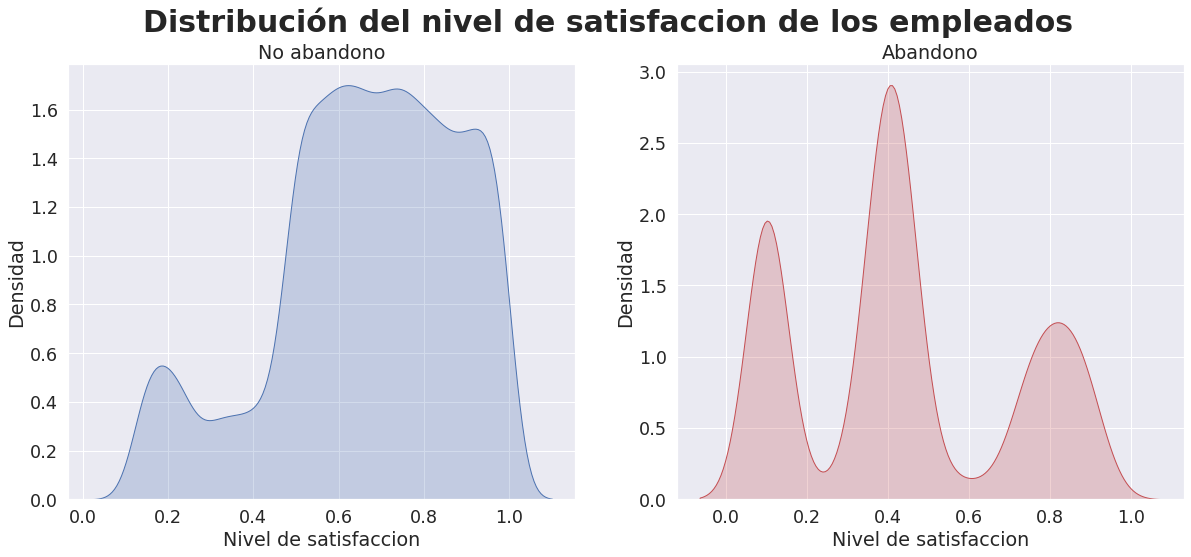

In [35]:
f, axes = plt.subplots(ncols=2, figsize=(20,8))
f.suptitle('Distribución del nivel de satisfaccion de los empleados',fontweight='bold', fontsize=30)

sns.kdeplot(df.loc[(df['abandono'] == 0),'satisfaccion'] , color='b',shade=True, ax=axes[0]).set_title('No abandono')
axes[0].set_xlabel('Nivel de satisfaccion')
axes[0].set_ylabel('Densidad')

sns.kdeplot(df.loc[(df['abandono'] == 1),'satisfaccion'] , color='r',shade=True, ax=axes[1]).set_title('Abandono')
axes[1].set_xlabel('Nivel de satisfaccion')
axes[1].set_ylabel('Densidad')

plt.show()

### 3.10) Numero de proyectos vs Promedio de horas trabajadas mensualmente

**Resumen:**

*   A medida que aumentaba el recuento de proyectos, también aumentaban las horas mensuales promedio
*   Algo extraño en el gráfico de diagrama de caja es la diferencia en el promedio de horas mensuales entre las personas que abandonaron y las que no lo hicieron.
*   Parece que los empleados **que no abandonaron** tuvieron un promedio **constante** de horas mensuales, a pesar del aumento en los proyectos
*   Por el contrario, los empleados que **abandonaron** tuvieron un aumento en el promedio de horas mensuales con el aumento de los proyectos

**Para y piensa:**

*   ¿Cuál podría ser el significado de esto?
*   **¿Por qué los empleados que se fueron trabajaron más horas que los empleados que no lo hicieron, incluso con la misma cantidad de proyectos?**

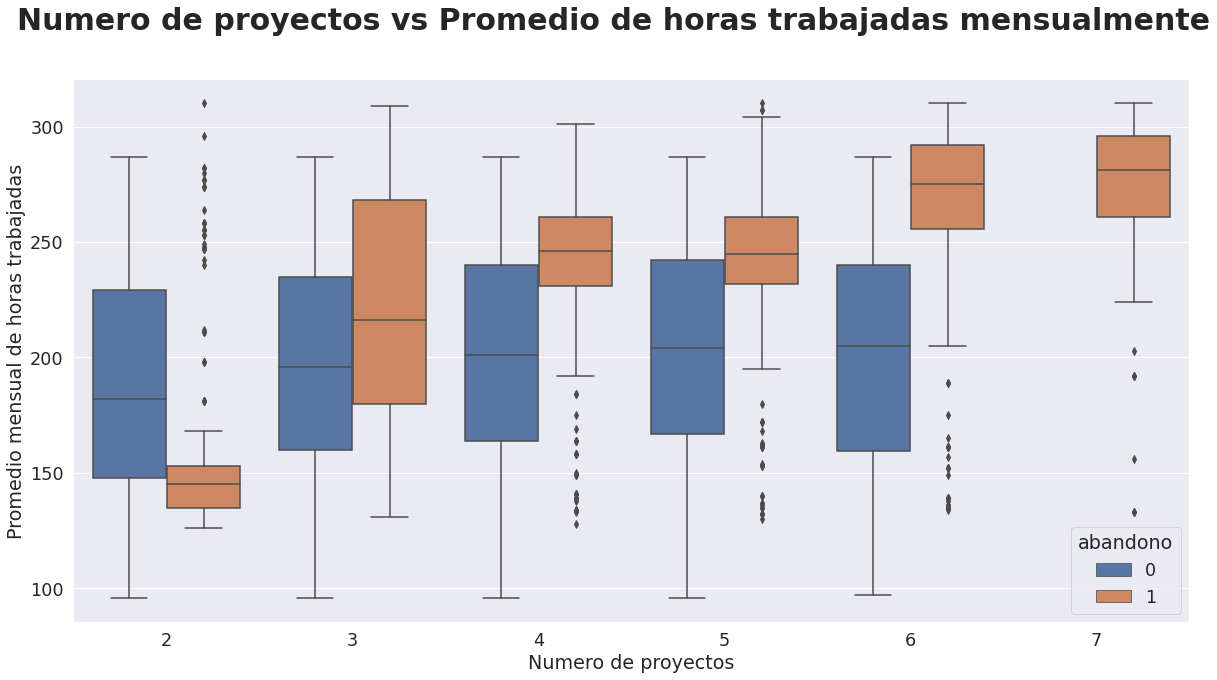

In [36]:
f, axes = plt.subplots(figsize=(20, 10))
f.suptitle('Numero de proyectos vs Promedio de horas trabajadas mensualmente',fontweight='bold', fontsize=30)
sns.boxplot(x="n_proyectos", y="promedio_horas_trabajadas", hue="abandono", data=df)
plt.xlabel('Numero de proyectos')
plt.ylabel('Promedio mensual de horas trabajadas')

plt.show()

### 3.11) Numero de proyectos vs Evaluacion

**Resumen:** Este gráfico se ve muy similar al gráfico anterior. Lo que me parece extraño con este gráfico es con el grupo de abandono. Hay un aumento en la evaluación para los empleados que hicieron más proyectos dentro del grupo de abandono. Pero, nuevamente para el grupo sin abandono, los empleados aquí obtuvieron un puntaje de evaluación consistente a pesar del aumento en los recuentos de proyectos.

**Preguntas para pensar:**

*   **¿Por qué los empleados que se fueron tuvieron, en promedio, una evaluación más alta que los empleados que no se fueron, incluso con un aumento en el conteo de proyectos?**
*   ¿No deberían los empleados con evaluaciones más bajas tender a abandonar más la empresa?

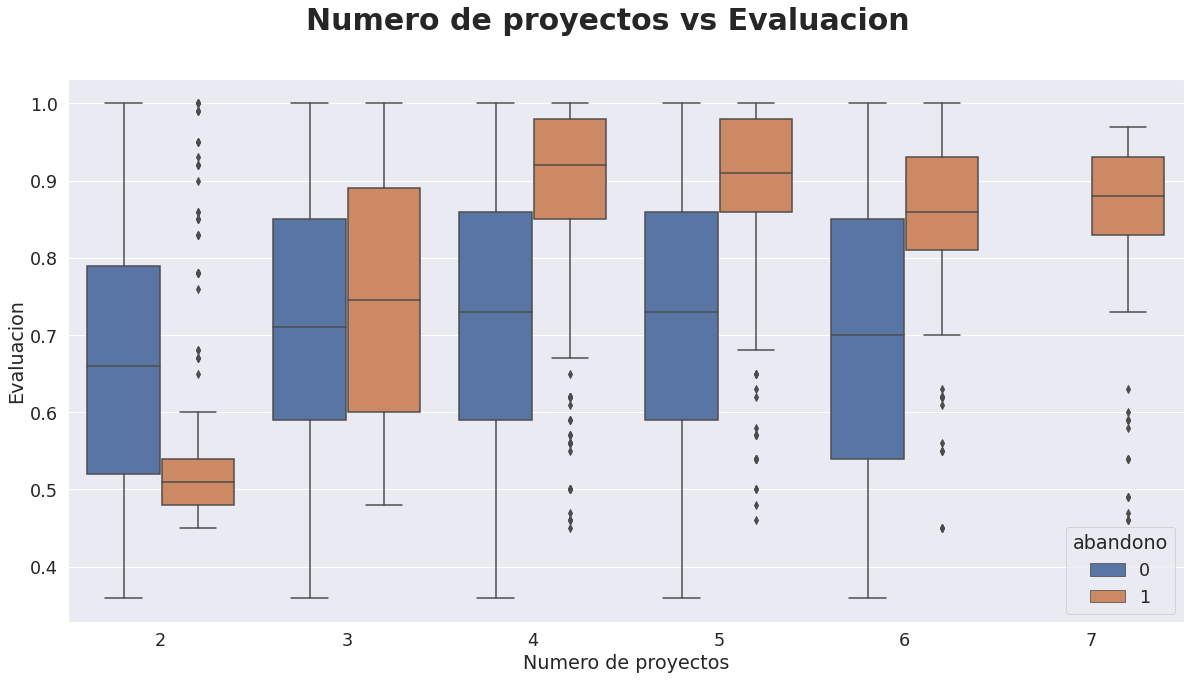

In [37]:
f, axes = plt.subplots(figsize=(20, 10))
f.suptitle('Numero de proyectos vs Evaluacion',fontweight='bold', fontsize=30)
sns.boxplot(x="n_proyectos", y="evaluacion", hue="abandono", data=df)
plt.xlabel('Numero de proyectos')
plt.ylabel('Evaluacion')

plt.show()

### 3.12) Nivel de satisfaccion vs Evaluacion

**Resumen:** este es, con mucho, el gráfico más convincente.

*   Hay **3** grupos distintos para los empleados que abandonaron la empresa.

**Grupo 1 (Empleado trabajador y triste):** la satisfacción fue inferior a 0,2 y las evaluaciones fueron superiores a 0,75. Lo cual podría ser una buena indicación de que los empleados que abandonaron la empresa eran buenos trabajadores pero se sentían horribles en su trabajo.

*   **Pregunta:** ¿Cuál podría ser la razón para sentirse tan horrible cuando eres altamente evaluado? ¿Podría estar trabajando demasiado duro? ¿Podría este grupo significar empleados que están "sobrecargados de trabajo"?

**Grupo 2 (Empleado malo y triste):** Satisfacción entre aproximadamente 0.35 ~ 0.45 y evaluaciones por debajo de ~ 0.58. Esto podría verse como empleados que fueron mal evaluados y se sintieron mal en el trabajo.

*   **Pregunta:** ¿Podría este grupo significar empleados que "tuvieron un desempeño inferior"?

**Grupo 3 (Empleado trabajador y feliz):** la satisfacción entre 0.7 ~ 1.0 y las evaluaciones fueron superiores a 0.8. Lo que podría significar que los empleados en este grupo eran "ideales". Les encantó su trabajo y fueron evaluados altamente por su desempeño.

*   **Pregunta:** ¿Podría este clúster significar que los empleados se fueron porque encontraron otra oportunidad de trabajo?

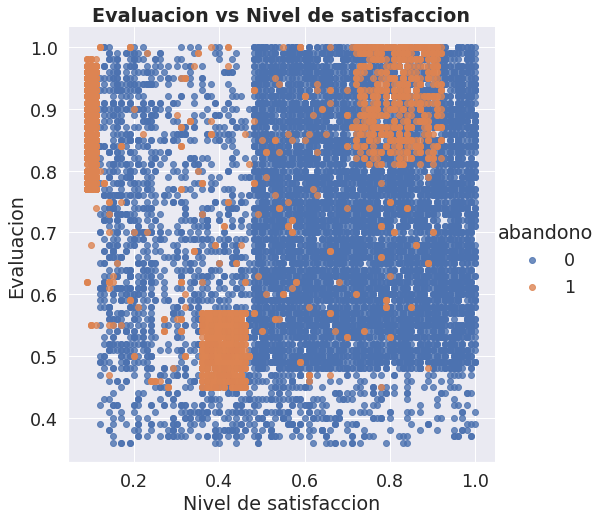

In [38]:
sns.lmplot(
    x='satisfaccion',
    y='evaluacion',
    data=df,
    height=7,
    fit_reg=False, # No regression line
    hue='abandono')   # Color by evolution stage
plt.title("Evaluacion vs Nivel de satisfaccion",fontweight="bold")
plt.xlabel('Nivel de satisfaccion')
plt.ylabel('Evaluacion')
plt.show()

### 3.13) Años en la compañia vs Abandono

**Resumen:** Veamos si hay un punto en el que los empleados comienzan a abandonar la empresa.
*   Más de la mitad de los empleados con **4 y 5** años abandonaron la empresa.
*   Los empleados con **5** años deben ser **altamente** investigados

**Para y piensa:**

*   ¿Por qué los empleados se van en su mayoría en el rango de **3-5** años?
*   ¿Quiénes son estos empleados que se fueron?
*   ¿Son estos empleados a tiempo parcial o contratistas?

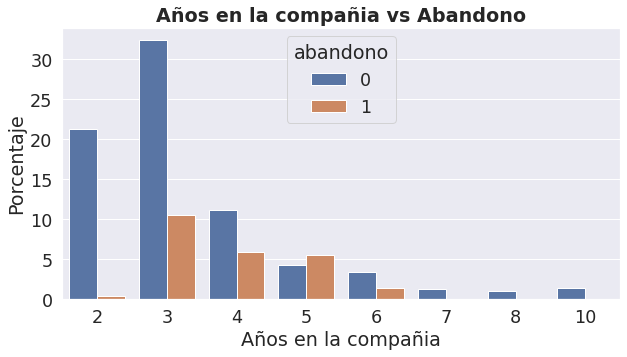

In [39]:
plt.subplots(figsize=(10, 5))
sns.barplot(
    x="antiguedad",
    y="antiguedad",
    hue="abandono",
    data=df,
    estimator=lambda x: len(x) / len(df) * 100
)
plt.xlabel("Años en la compañia")
plt.ylabel("Porcentaje")
plt.title("Años en la compañia vs Abandono",fontweight="bold")
plt.show()

### 3.14) Agrupación con K-means de empleados que abandonaron

**Cluster 1 (Azul):** Empleados trabajadores y tristes

**Cluster 2 (Verde):** Empleado malo y triste

**Cluster 3 (Rojo):** Empleado trabajador y feliz

**PROBLEMA de agrupamiento:**

```
- ¿Cómo sabemos que hay "3" grupos?
- Por la visualizacion podemos concluir que hay 3 grupos pero de no ser asi podemos utilizar un metodo iterativo donde en cada iteracion se aumente el numero de grupos y posteriormente evaluar para saber cual es el numero correcto de clusteres.
- Estructuras ocultas desconocidas podrían estar presentes
```

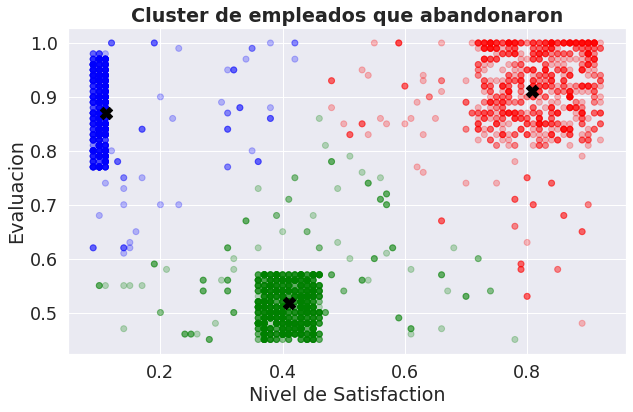

In [40]:
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.abandono==1][["satisfaccion","evaluacion"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaccion",y="evaluacion", data=df[df.abandono==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Nivel de Satisfaction")
plt.ylabel("Evaluacion")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=150)
plt.title("Cluster de empleados que abandonaron",fontweight="bold")
plt.show()

### 3.15) Importancia de la caracteristica

**Resumen:**

Al usar un clasificador de árbol de decisión, podría clasificar las características utilizadas para la predicción. Las tres características principales fueron satisfacción de los empleados, años en la empresa y evaluación. Esto es útil para crear nuestro modelo de regresión logística, ya que será más interpretable comprender lo que incluye nuestro modelo cuando utilizamos menos funciones.

**3 características principales:**

1. Satisfacción
2. Años en la empresa
3. Evaluación

Importamos los metodos que utilizaremos para poder hacer uso de los arboles de decision.

In [41]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

Como los arboles de decisiones y cualquier otro modelo trabaja mejor con numeros que con categorias entonces es necesario transformar a numeros donde un numero representa una categoria.  
Por ejemplo en la variable ```salario``` hay tres categorias que son ```high```, ```medium``` and ```low``` que ahora seran remplazadas por ```3```, ```2``` y ```1```.

In [42]:
df_var_important = df.copy()

# Convert these variables into categorical variables
df_var_important["departamento"] = df_var_important["departamento"].astype('category').cat.codes
df_var_important["salario"] = df_var_important["salario"].astype('category').cat.codes

df_var_important.head()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion,departamento,salario,satisfaccion_cat
0,0.38,0.53,2,157,3,0,1,0,7,1,Regular
1,0.80,0.86,5,262,6,0,1,0,7,2,Satisfecho
2,0.11,0.88,7,272,4,0,1,0,7,2,Insatisfecho
3,0.72,0.87,5,223,5,0,1,0,7,1,Satisfecho
4,0.37,0.52,2,159,3,0,1,0,7,1,Regular


Al utilizar el modelo de arboles de decision necesitamos tener nuestros datos de entretamiento y test.  
Por esta razon dividmos los datos.

In [43]:
target_name = 'abandono'

y= df_var_important[target_name]
X = df_var_important.drop(['abandono','satisfaccion_cat'], axis=1).copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

Configuramos nuestro modelo para el entrenamiento.

In [44]:
dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )

Entrenamos el modelo.

In [45]:
dtree = dtree.fit(X_train,y_train)

Despues de entrenar el modelo almacenamos en una variable ```importances``` las variables con un valor que determina cuanto influyen al momento de predecir los datos. Siendo asi que las variables con un valor elevado significa que influye mucho al momento de predecir un resultado. Recordemos que entrenamos un modelo de arbol de decision solo con el proposito de obtener estas caracteristicas importantes.

In [46]:
importances = dtree.feature_importances_
feat_names = df_var_important.drop(['abandono'],axis=1).columns

Ahora graficamos estas variables y su nivel de influencia al momento de predecir una resultado de abandono o no.

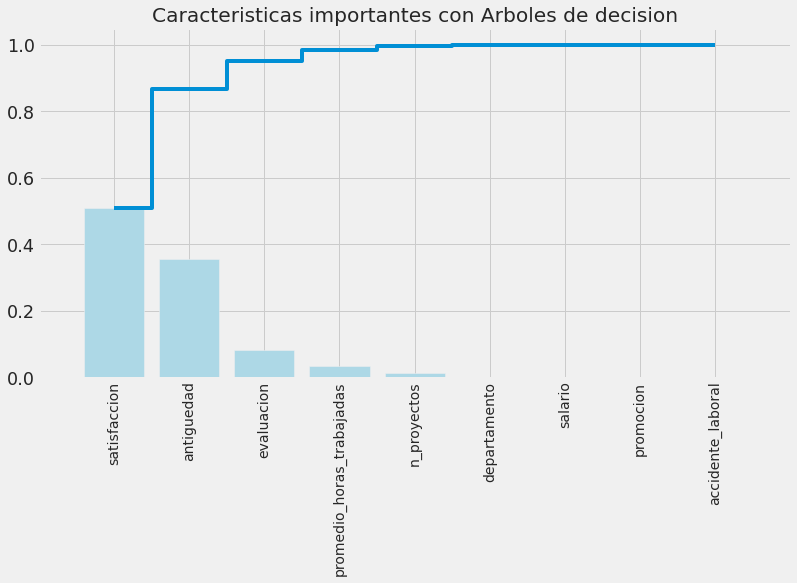

In [47]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Caracteristicas importantes con Arboles de decision")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## 4) Modelado de los datos

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
df.head()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion,departamento,salario,satisfaccion_cat
0,0.38,0.53,2,157,3,0,1,0,sales,low,Regular
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Satisfecho
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Insatisfecho
3,0.72,0.87,5,223,5,0,1,0,sales,low,Satisfecho
4,0.37,0.52,2,159,3,0,1,0,sales,low,Regular


### 4.1) Regresion Logistica
Rescatando las caracteristicas mas importantes del arbol de decision utilizaremos ahora con el algoritmo de Regresion Logistica para entrenar un nuevo modelo, con estas caracteristicaz que sabemos que son importantes, ya que al entrenar con todas las caractisticas de nuestra columna podemos generalizar demasiado o lo ajustar los datos.

#### Transformando datos

In [51]:
datos = df.copy()

In [52]:
# Convertiendo estas variables en variables categoricas
datos['departamento'] = datos['departamento'].astype('category').cat.codes
datos['salario'] = datos['salario'].astype('category').cat.codes

In [53]:
datos.head()

,satisfaccion,evaluacion,n_proyectos,promedio_horas_trabajadas,antiguedad,accidente_laboral,abandono,promocion,departamento,salario,satisfaccion_cat
0,0.38,0.53,2,157,3,0,1,0,7,1,Regular
1,0.80,0.86,5,262,6,0,1,0,7,2,Satisfecho
2,0.11,0.88,7,272,4,0,1,0,7,2,Insatisfecho
3,0.72,0.87,5,223,5,0,1,0,7,1,Satisfecho
4,0.37,0.52,2,159,3,0,1,0,7,1,Regular


Movemos la columna ```abandono``` a la primera posicion.

In [54]:
front = df['abandono']
datos.drop(labels=['abandono'], axis=1, inplace=True)
datos.insert(0, 'abandono', front)

Creamos la columna con puros ```1```

In [55]:
datos['int'] = 1
indep_var = ['satisfaccion', 'evaluacion','antiguedad','n_proyectos','int', 'abandono']
datos_reg = datos[indep_var].copy()

In [56]:
target_name = 'abandono'
X = datos_reg.drop('abandono',axis=1)
y = datos_reg[target_name]

In [57]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X,y,test_size=0.15, random_state=0, stratify=y)

#### Importando el modelo de Regresion logistica

In [58]:
from sklearn.linear_model import LogisticRegression

#### Entrenamos el modelo

In [59]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(Xr_train,yr_train)

LogisticRegression(random_state=0)

#### Midiendo la precision del modelo

In [60]:
prediccion = logistic_model.predict(Xr_test)
precision = metrics.accuracy_score(yr_test,prediccion)
print(f'La precision para X_test es : {precision}')

La precision para X_test es : 0.7715555555555556


#### Midiendo la precision del modelo con Cross validation

In [61]:
logic_model = LogisticRegression(random_state=0)
scores = cross_val_score(logic_model,Xr_train, yr_train, cv=5)
print(f'La precision del modelo es de {scores.mean()} y la desviacion estandar es de {scores.std()}')

La precision del modelo es de 0.7639816306279279 y la desviacion estandar es de 0.0030808431772660684


#### Midiendo el error del modelo

In [62]:
prediccion = logistic_model.predict(Xr_test)
mae = metrics.mean_absolute_error(yr_test,prediccion)
print(f'El error absoluto para X_test es : {mae}')

El error absoluto para X_test es : 0.22844444444444445


#### Coeficientes encontrados para el modelo de regresion logistica

In [63]:
logistic_model.coef_

array([[-4.0481315 ,  0.99257662,  0.19250026, -0.2260593 ,  0.26680124]])

In [64]:
Xr_train.columns

Index(['satisfaccion', 'evaluacion', 'antiguedad', 'n_proyectos', 'int'], dtype='object')

In [65]:
coeficientes = pd.Series(
    logistic_model.coef_[0,:],
    index=Xr_train.columns
)
coeficientes

satisfaccion   -4.048132
evaluacion      0.992577
antiguedad      0.192500
n_proyectos    -0.226059
int             0.266801
dtype: float64

### 4.2) Arboles de Decision

#### Transformando los datos

In [66]:
datos = df.copy()

In [67]:
datos['departamento'] = datos['departamento'].astype('category').cat.codes
datos['salario'] = datos['salario'].astype('category').cat.codes

# Separando los datos para test y entrenamiento
X = datos.drop(['abandono', 'departamento', 'satisfaccion_cat'],axis=1)
y = datos['abandono']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)


#### Importando el modelo de arbol de decision para clasificacion

In [68]:
from sklearn.tree import DecisionTreeClassifier

#### Entrenando el modelo

In [69]:
# El parametro class_weight = balanced ayuda a balancear la cantidad 
# de los datos perteneciente a cada clase

tree_model = DecisionTreeClassifier(
    random_state=123,
    class_weight='balanced',
    min_weight_fraction_leaf=0.01
)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf=0.01,
                       random_state=123)

#### Midiendo la precision del modelo de arbol de decision

In [70]:
prediccion = tree_model.predict(X_test)
precision = metrics.accuracy_score(y_test,prediccion)
print(f'La precision para X_test es : {precision}')

La precision para X_test es : 0.96


#### Midiendo la precision del modelo con cross validation

In [71]:
t_model = DecisionTreeClassifier(
    random_state=123,
    class_weight='balanced',
    min_weight_fraction_leaf=0.01
)
scores = cross_val_score(t_model,X_train, y_train, cv=5)
print(f'La precision del modelo es de {scores.mean()} y la desviacion estandar es de {scores.std()}')

La precision del modelo es de 0.960545511888553 y la desviacion estandar es de 0.005209638799301829


#### Midiendo el error del modelo

In [72]:
prediccion = tree_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,prediccion)
print(f'El error absoluto para X_test es : {mae}')

El error absoluto para X_test es : 0.04


#### Variables encontradas del modelo ( Feature Importance )

In [73]:
caracteristicas = tree_model.feature_importances_
caracteristicas

array([5.09722166e-01, 8.39919887e-02, 1.32940279e-02, 3.57629379e-02,
       3.57167225e-01, 0.00000000e+00, 0.00000000e+00, 6.16548564e-05])

In [74]:
caract_imp = pd.Series(
    caracteristicas,
    index=X_test.columns
)
caract_imp = caract_imp.sort_values(ascending=False)

<AxesSubplot:>

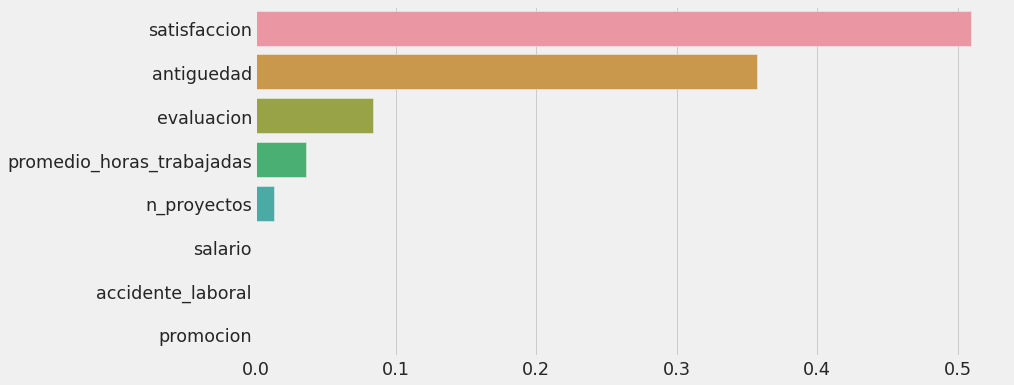

In [75]:
sns.barplot(y=caract_imp.index,x=caract_imp.values)

### 4.3) Random Forest

#### Transformando los datos

In [76]:
datos = df.copy()

In [77]:
datos['departamento'] = datos['departamento'].astype('category').cat.codes
datos['salario'] = datos['salario'].astype('category').cat.codes

# Separando los datos para test y entrenamiento
X = datos.drop(['abandono', 'departamento', 'satisfaccion_cat'],axis=1)
y = datos['abandono']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)


#### Importando el modelo

In [78]:
from sklearn.ensemble import RandomForestClassifier

#### Entrenando el modelo

In [79]:
forest_model =  RandomForestClassifier(random_state=123, min_weight_fraction_leaf=0.01)
forest_model.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0.01, random_state=123)

#### Midiendo la precision del modelo

In [80]:
prediccion = forest_model.predict(X_test)
precision = metrics.accuracy_score(y_test,prediccion)
print(f'La precision para X_test es : {precision}')

La precision para X_test es : 0.9671111111111111


#### Midiendo la precision del modelo con cross validation

In [81]:
rf_model = RandomForestClassifier(random_state=123, min_weight_fraction_leaf=0.005)
scores = cross_val_score(rf_model,X, y, cv=5)
print(f'La precision del modelo es de {scores.mean()} y la desviacion estandar es de {scores.std()}')

La precision del modelo es de 0.9725979771034791 y la desviacion estandar es de 0.002083452163338675


#### Midiendo el error del modelo

In [82]:
prediccion = forest_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,prediccion)
print(f'El error absoluto para X_test es : {mae}')

El error absoluto para X_test es : 0.03288888888888889


#### Variables encontradas del modelo ( Feature Importance )

In [83]:
caracteristicas = forest_model.feature_importances_

In [84]:
caract_imp = pd.Series(
    caracteristicas,
    index=X_test.columns
)
caract_imp = caract_imp.sort_values(ascending=False)

<AxesSubplot:>

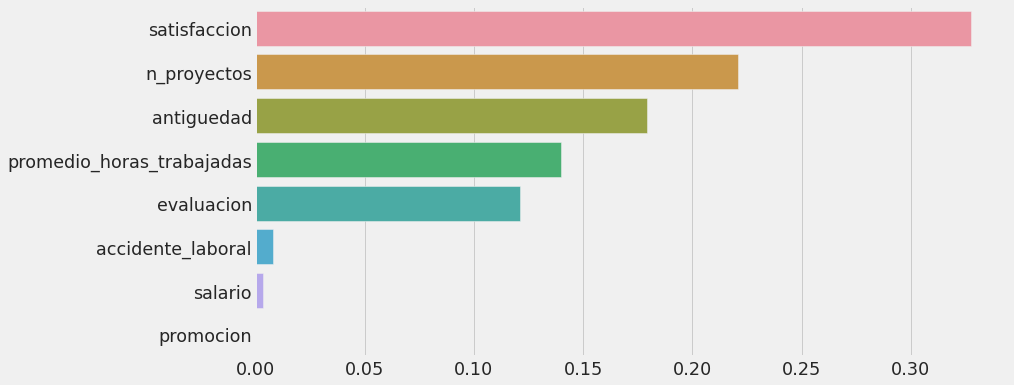

In [85]:
sns.barplot(y=caract_imp.index,x=caract_imp.values)

### 4.d) AdaBoost (Adaptative Boosting)

In [86]:
datos = df.copy()

In [87]:
# Convertiendo estas variables en variables categoricas
datos['departamento'] = datos['departamento'].astype('category').cat.codes
datos['salario'] = datos['salario'].astype('category').cat.codes

In [88]:
# Separando los datos para test y entrenamiento
X = datos.drop(['abandono','departamento', 'satisfaccion_cat'],axis=1)
y = datos['abandono']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123, stratify=y)

#### Importando el modelo de Adaboost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

#### Entrenando el modelo

In [90]:
adaboost_model = AdaBoostClassifier(random_state=123, n_estimators=50)

In [91]:
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

#### Midiendo la precision del modelo

In [92]:
prediccion = adaboost_model.predict(X_test)
precision = metrics.accuracy_score(y_test, prediccion)
print(f'La precision para X_Test es: {precision}')

La precision para X_Test es: 0.9511111111111111


#### Midiendo la precision del modelo con Cross Validation

In [93]:
adb_model = AdaBoostClassifier(random_state=123, n_estimators=50)
scores = cross_val_score(adb_model,X_train, y_train, cv=5)
print(f'La precision del modelo es de {scores.mean()} y la desviacion estandar es de {scores.std()}')

La precision del modelo es de 0.9605453888106832 y la desviacion estandar es de 0.005281212154233403


#### Matriz de confusion

In [94]:
metrics.confusion_matrix(y_test, prediccion)

array([[1658,   56],
       [  54,  482]])

**Nota : Precision del modelo Base**
---
*   Un modelo base es un modelo simple o heuristico utilizado como punto de referencia para comparar que tan bien se esta desempeñando un modelo. Un modelo base ayuda a las personas que desarrollan modelos a cuantificar el rendimiento minimo esperado en un problema particular. En este conjunto de datos, la clase mayoritaria que se pronosticara sera 0 (empleados que no abandonaron la epresa)

*   Si recordamos en la parte de Explorando los datos el 24% del conjunto de datos contenia 1 (empleado que dejo la empresa) y 76%  restante contenia 0(empleado que no abandono la empresa)

*   Ejemplo : La precision del modelo base para este conjunto de datos, al clasificar todo como 0 seria del 76% porque  el 76% del conjunto de datos estan etiquetados como 0

In [95]:
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [96]:
y_base_rate = base_rate_model(X_test)
print(f"La precision del modelo base es : {metrics.accuracy_score(y_test, y_base_rate)}")

La precision del modelo base es : 0.7617777777777778


In [97]:
# Predecir por probabilidad que nos permite crear otro funcion donde
# si se pueda mover el umbral o threshold
forest_model.predict_proba(X_test[:10])

array([[0.997028  , 0.002972  ],
       [0.93806225, 0.06193775],
       [0.95626912, 0.04373088],
       [0.27660505, 0.72339495],
       [0.2095477 , 0.7904523 ],
       [0.97626501, 0.02373499],
       [0.98450461, 0.01549539],
       [0.24696609, 0.75303391],
       [0.93960425, 0.06039575],
       [0.82585408, 0.17414592]])

## Receiver operating characteristic (Curva ROC)

Una curva característica de funcionamiento del receptor, o curva ROC, es un diagrama gráfico que ilustra la capacidad de diagnóstico de un sistema clasificador binario a medida que se varía su umbral de discriminación.

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

In [99]:
# logistic_model,tree_model,forest_model, adaboost_model

In [100]:
roc_auc_score(y_test, forest_model.predict(X_test))

0.9431514394190076

In [101]:
yr_test

1116     1
6728     0
173      1
9557     0
6940     0
        ..
11514    0
3316     0
3193     0
1662     1
13248    0
Name: abandono, Length: 2250, dtype: int64

#### Graficamos la curva ROC con todos los modelos previamente entrenados.

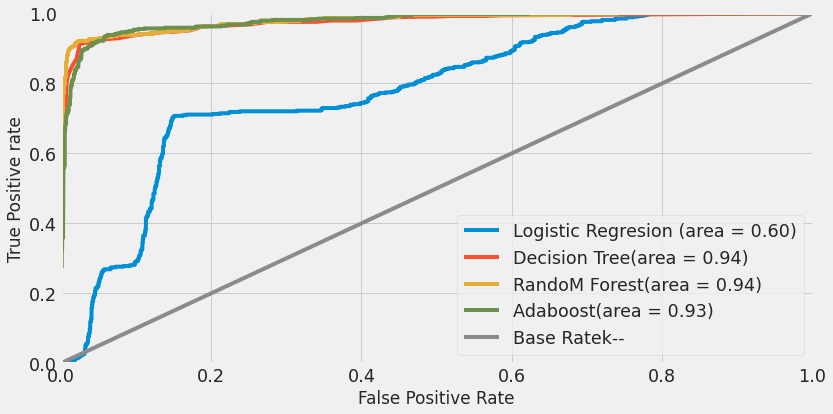

In [102]:

lr_fpr, lr_tpr, lr_thresholds = roc_curve(yr_test, logistic_model.predict_proba(Xr_test)[:,1])
lr_roc_auc = roc_auc_score(yr_test, logistic_model.predict(Xr_test))

t_fpr, t_tpr, t_thresholds = roc_curve(y_test, tree_model.predict_proba(X_test)[:,1])
t_roc_auc = roc_auc_score(y_test, tree_model.predict(X_test))

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, forest_model.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, forest_model.predict(X_test))

ad_fpr, ad_tpr, ad_thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:,1])
ad_roc_auc = roc_auc_score(y_test, adaboost_model.predict(X_test))
# Plot Logistic Regresion ROc
plt.plot(lr_fpr, lr_tpr, label='Logistic Regresion (area = %0.2f)' %lr_roc_auc)
# Plot Decision Tree ROc
plt.plot(t_fpr, t_tpr, label='Decision Tree(area = %0.2f)' %t_roc_auc)
# Plot Random Forest ROc
plt.plot(rf_fpr, rf_tpr, label='RandoM Forest(area = %0.2f)' %rf_roc_auc)
# Plot Adaboot ROc
plt.plot(ad_fpr, ad_tpr, label='Adaboost(area = %0.2f)' %ad_roc_auc)
# Plot Base rate model ROc
plt.plot([0,1], [0,1], label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc="lower right")
plt.show()

## Parte final : entrenar el mejor el modelo con todos los datos

En esta parte entrenamos todos los datos con el mejor modelo, en este caso es ```Random Forest```

In [103]:
forest_model_final =  RandomForestClassifier(random_state=123, min_weight_fraction_leaf=0.01)
forest_model_final.fit(X, y)

RandomForestClassifier(min_weight_fraction_leaf=0.01, random_state=123)

Modimos 

In [104]:
prediction = forest_model_final.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.9684444444444444

## 5) Interpretacion de los datos

***Resumen:*** Con toda esta información, esto es lo que se debería saber sobre esta empresa y por qué sus empleados probablemente se fueron:

1. Los empleados generalmente se van cuando no tienen suficiente trabajo (menos de 150 horas al mes o 6 horas al día)
2. Los empleados generalmente se van cuando tienen exceso de trabajo (más de 250 horas al mes o 10 horas al día)
3. Los empleados con evaluaciones realmente altas o bajas deben tenerse en cuenta para una alta tasa de abandono.
4. Los empleados con salarios bajos a medios son la mayor parte de los empleados que abandonan la empresa.
5. Los empleados que tenían 2,6 o 7 proyectos estaban en riesgo de dejar la empresa.
6. El nivel de satisfacción de los empleados es el indicador más alto de abandono de empleados.
7. Empleado que tuvo 4 y 5 años en la empresa debe tenerse en cuenta por su alta tasa de abandono.
8. El nivel de satisfacción de los empleados, los años en la empresa y la evaluación fueron los tres factores más importantes para determinar el abandono de empleados.